# Zonas de salud con mayor indicencia 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
WORK_FOLDER='../'

In [3]:
DATE='fecha_informe'
ZONES='zona_basica_salud'
RATE_ACTIVE_14='tasa_incidencia_acumulada_activos_ultimos_14dias'
RATE_14='tasa_incidencia_acumulada_ultimos_14dias'
RATE_TOTAL='tasa_incidencia_acumulada_total'

## Carga de datos de la fuente oficial 

In [4]:
# Datos semanales desde el 02/07/2020
#!wget https://datos.comunidad.madrid/catalogo/dataset/b3d55e40-8263-4c0b-827d-2bb23b5e7bab/resource/43708c23-2b77-48fd-9986-fa97691a2d59/download/covid19_tia_zonas_basicas_salud_s.csv --no-check-certificat -O ../datasets/covid19_tia_zonas_basicas_salud_s.csv

## Preparacion de datos

In [5]:
# Listado de Zonas restringidas

In [6]:
restricted=['Puerta Bonita','Vista Alegre','Guayaba','Doctor Cirajas','Gandhi','Daroca','La Elipa','Entrevías','Martínez de la Riva','San Diego','Numancia','Peña Prieta','Pozo del Tío Raimundo','Ángela Uriarte','Alcalá de Guadaira','Federica Montseny','Almendrales','Las Calesas','Zofío','Orcasur','San Fermín','Villa de Vallecas','San Andrés','San Cristóbal','El Espinillo','Los Rosales','Alcobendas-Chopera','Miraflores','Alicante','Cuzco','Francia','Las Margaritas','Sánchez Morate','Humanes de Madrid','San Blas','Isabel II','Reyes Católicos']

In [7]:
# Datos oficiales
df = pd.read_csv(WORK_FOLDER + 'datasets/covid19_tia_zonas_basicas_salud_s.csv', encoding='latin-1', sep=';')
filtered = df[df[DATE]==df[DATE].max()]
select = filtered[[ZONES,RATE_ACTIVE_14,RATE_14,RATE_TOTAL]]
select['temp1']=select[RATE_ACTIVE_14].apply(lambda x: float(x.replace(',','.')))
select['temp2']=select[RATE_14].apply(lambda x: float(x.replace(',','.')))
select['temp3']=select[RATE_TOTAL].apply(lambda x: float(x.replace(',','.')))
select.drop(labels=[RATE_ACTIVE_14, RATE_14, RATE_TOTAL], axis=1, inplace=True)
select.columns=[ZONES,RATE_ACTIVE_14, RATE_14, RATE_TOTAL]

/Volumes/TOSHIBA EXT/Documents/GitRepos/covidmadrid/venv2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Volumes/TOSHIBA EXT/Documents/GitRepos/covidmadrid/venv2/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Volumes/TOSHIBA EXT/Documents/GitRepos/covidmadrid/venv2/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

## Visualizacion

Se muestra la incidencia de las N zonas con mas incidencia de cada uno de los siguientes parámetros (casos activos y no activos en los útimos 14 dias): (casos/100.000 hab).

Se puede consultar [aqui](https://www.madrid.org/iestadis/fijas/estructu/general/territorio/estructucartemzbs.htm) la ubucación exacta de cada zona.

In [8]:
N=150

In [52]:
def plotFilterBy(df, f, N):
    top = df.sort_values(by=f, ascending=False).head(N).sort_values(by=ZONES)
    
    plt.figure(figsize=[14,30])
    sns.barplot(data=top, x=f, y=ZONES, orient='h')
    
    v=top[f]
    return (v.min(),v.max())

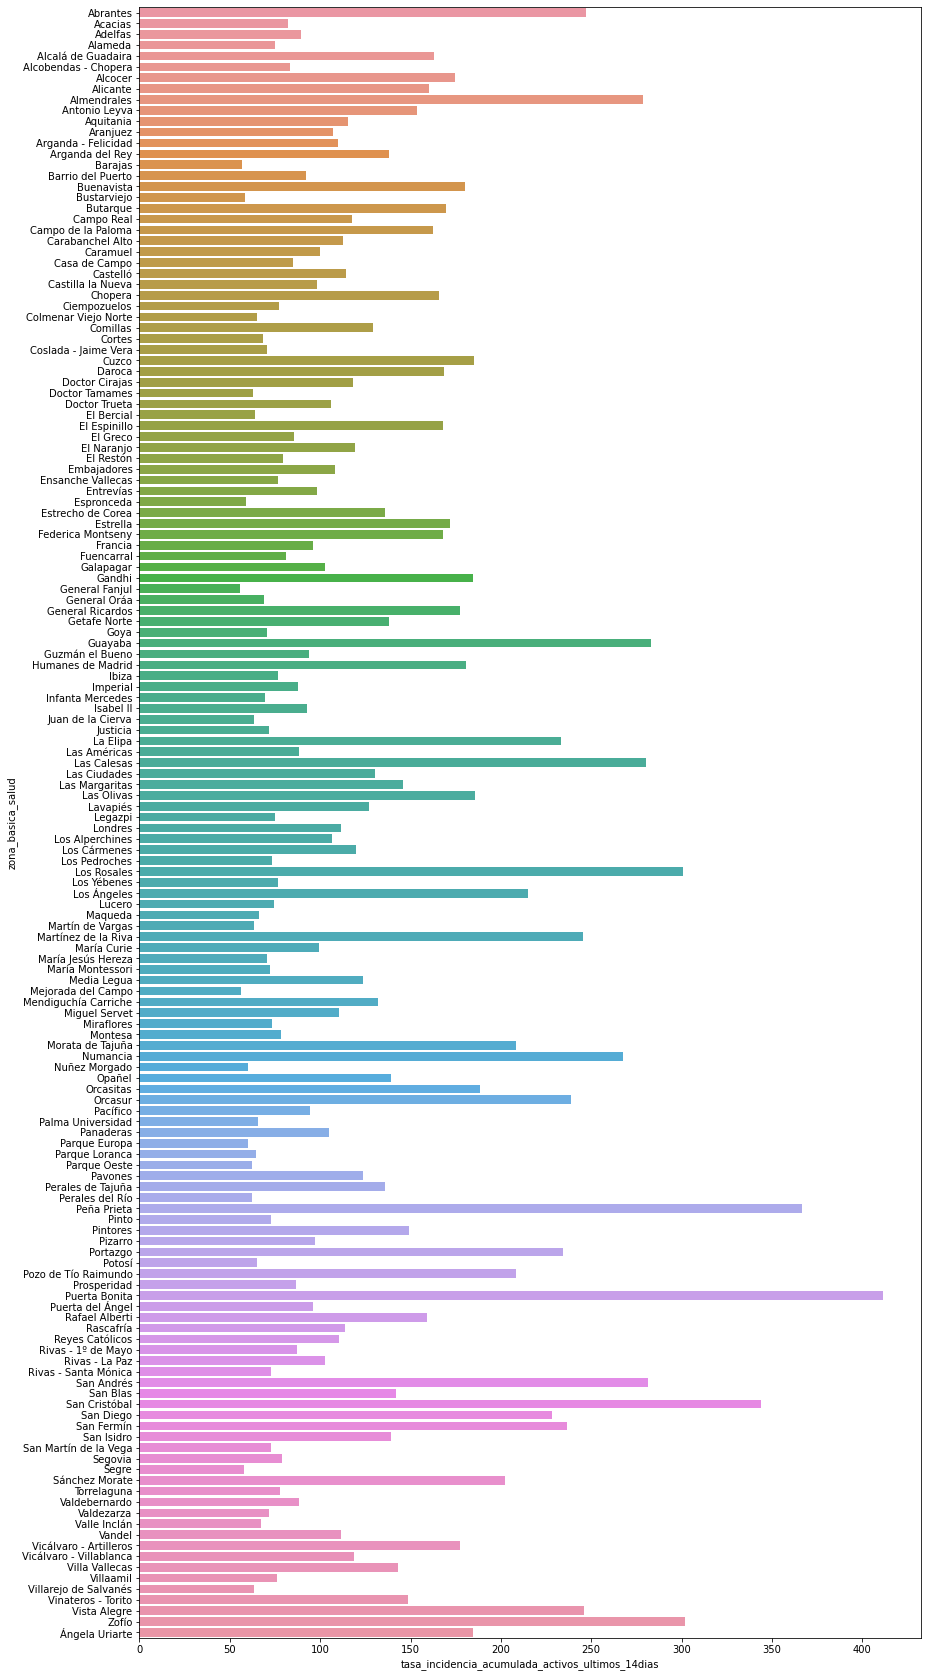

In [53]:
(ra_min, ra_max)=plotFilterBy(select, RATE_ACTIVE_14,N)

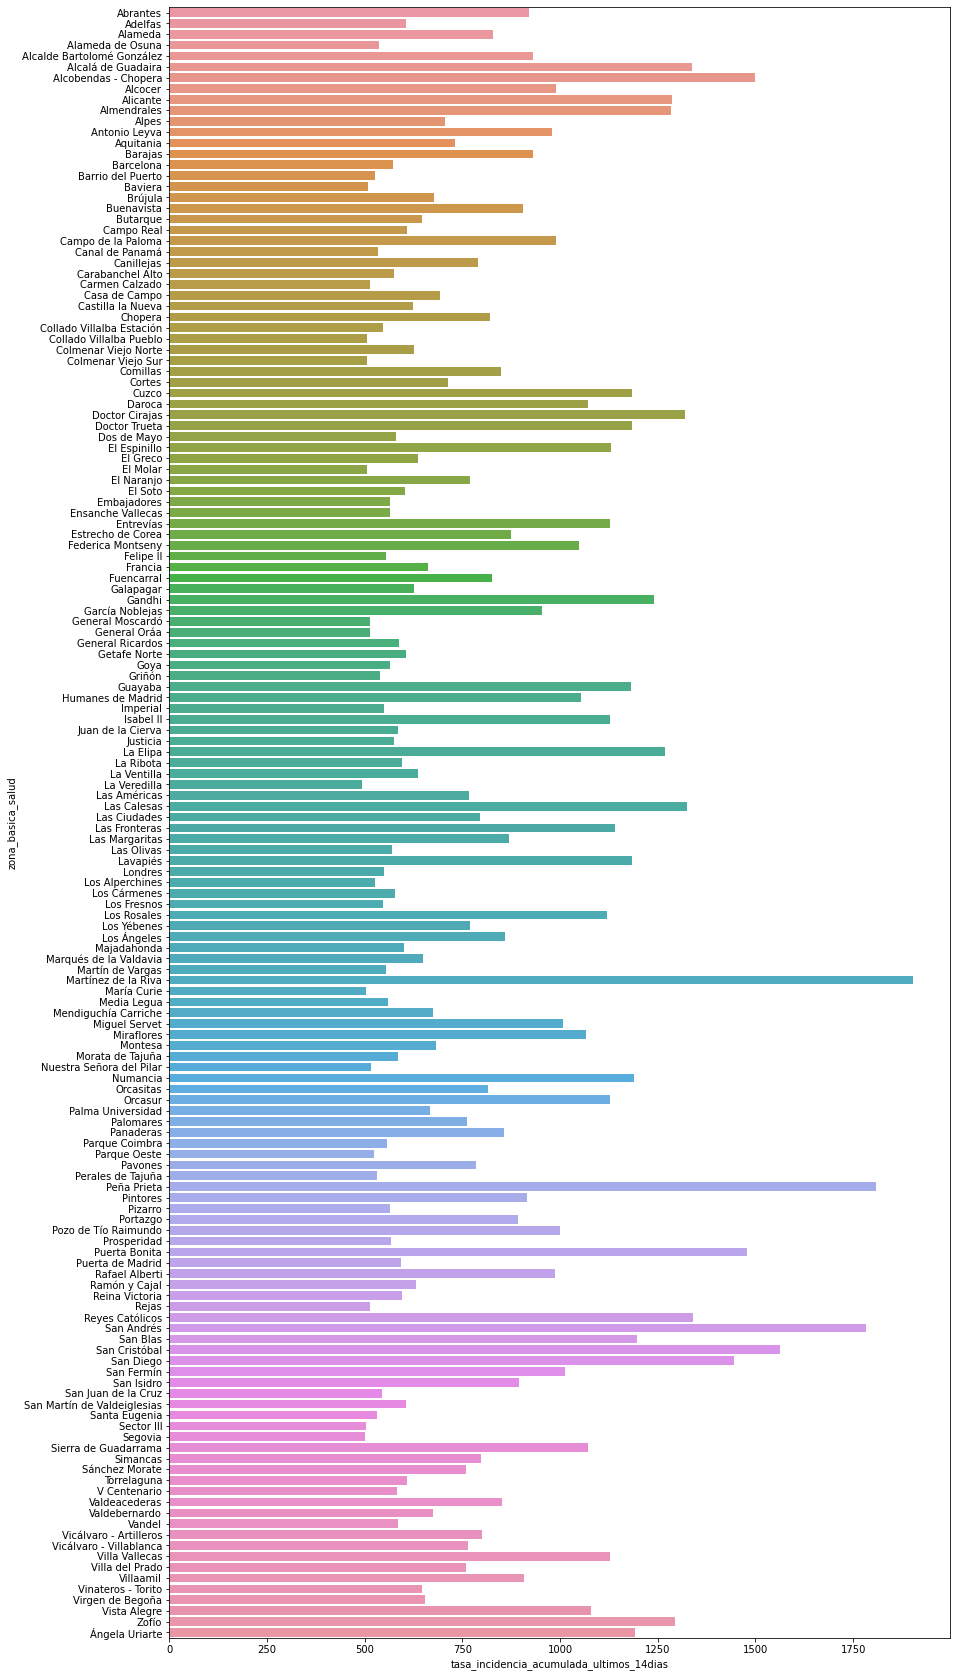

In [54]:
(r_min, r_max)=plotFilterBy(select, RATE_14, N)


## Visualización combinada de casos en los últimos 15 dias 

In [42]:
print('umbrales:',ra_min,',',r_min)

umbrales: 55.67 , 492.69


In [43]:
last_days_rate_th=r_min
last_days_rate_active_th=ra_min

In [44]:
select_bi = select[select[RATE_14]>last_days_rate_th][select[RATE_ACTIVE_14]>last_days_rate_active_th]
select_bi.reset_index(drop=True, inplace=True)

/Volumes/TOSHIBA EXT/Documents/GitRepos/covidmadrid/venv2/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [45]:
print(select_bi.shape[0],'zonas se ajustan a los umbrales')

107 zonas se ajustan a los umbrales


In [46]:
select_bi['restricted']=select_bi[ZONES].apply(lambda x: x in restricted)
select_bi_rest = select_bi[select_bi['restricted']]
select_bi_rest.reset_index(drop=True, inplace=True)
select_bi_miss = select_bi[~select_bi['restricted']]
select_bi_miss.reset_index(drop=True, inplace=True)

In [47]:
print('¿Cuantas zones restringidas están en estos umbrales?',select_bi_rest.shape[0])

¿Cuantas zones restringidas están en estos umbrales? 34


Text(0, 0.5, 'tasa_incidencia_acumulada_activos_ultimos_14dias')

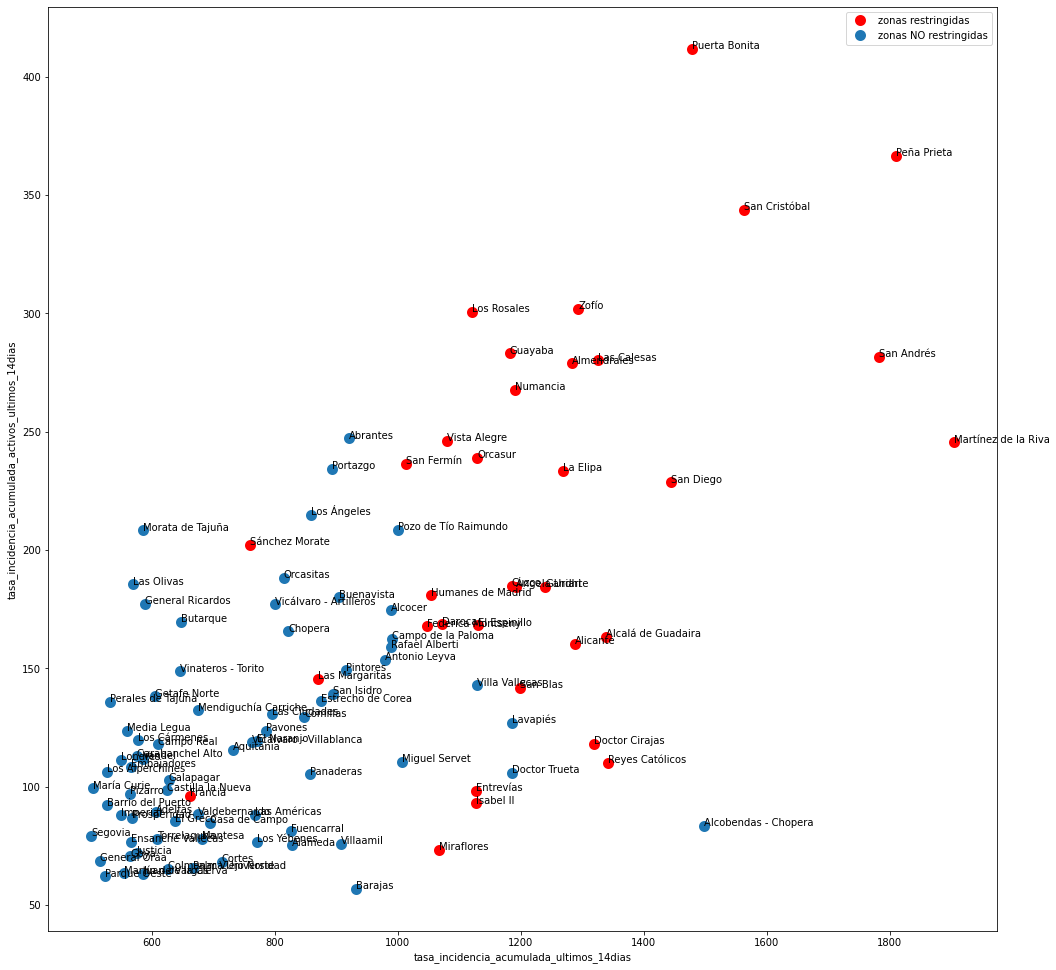

In [51]:
plt.figure(figsize=[17,17])
for i in np.arange(select_bi_rest.shape[0]):
    plt.annotate(select_bi_rest[ZONES][i],xy=(select_bi_rest[RATE_14][i],select_bi_rest[RATE_ACTIVE_14][i]))
for i in np.arange(select_bi_miss.shape[0]):
    plt.annotate(select_bi_miss[ZONES][i],xy=(select_bi_miss[RATE_14][i],select_bi_miss[RATE_ACTIVE_14][i]))
plt.plot(select_bi_rest[RATE_14],select_bi_rest[RATE_ACTIVE_14],'or',select_bi_miss[RATE_14],select_bi_miss[RATE_ACTIVE_14],'o',mew=5,)
plt.legend(['zonas restringidas','zonas NO restringidas'])
plt.xlabel(RATE_14)
plt.ylabel(RATE_ACTIVE_14)

# Enf of analysis! 